In [327]:
from IPython.display import Image, display

display(Image(filename="headerImage.png"))


# PYTHON ML PROJECT ON TITANIC DATASET:

## Data Dictionary:

In [328]:
'''

Variable	Definition	         Key


survival	Survival	         0 = No, 1 = Yes
pclass	    Ticket class	     1 = 1st, 2 = 2nd, 3 = 3rd
sex	        Sex	
Age	        Age in years	
sibsp	    no. of siblings / spouses aboard the Titanic	
parch	    no. of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare (in British pounds (£))
cabin	    Cabin number	
embarked	Port of Embarkation	  C = Cherbourg, Q = Queenstown, S = Southampton


'''

'\n\nVariable\tDefinition\t         Key\n\n\nsurvival\tSurvival\t         0 = No, 1 = Yes\npclass\t    Ticket class\t     1 = 1st, 2 = 2nd, 3 = 3rd\nsex\t        Sex\t\nAge\t        Age in years\t\nsibsp\t    no. of siblings / spouses aboard the Titanic\t\nparch\t    no. of parents / children aboard the Titanic\t\nticket\t    Ticket number\t\nfare\t    Passenger fare (in British pounds (£))\ncabin\t    Cabin number\t\nembarked\tPort of Embarkation\t  C = Cherbourg, Q = Queenstown, S = Southampton\n\n\n'

## Import the dataset:

In [329]:
import pandas as pd

df = pd.read_csv("train.csv")

## Ignore warnings:

In [330]:
import warnings
warnings.filterwarnings('ignore')

## Do some basic inspections:

### Check how many rows and columns exist:

In [331]:
print("No. of rows in the dataset = ",df.shape[0])
print("No. of columns in the dataset = ",df.shape[1])


No. of rows in the dataset =  891
No. of columns in the dataset =  12


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [333]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [334]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handle missing-values:

In [335]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)


In [336]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## View the first few rows of the dataset:

In [337]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Create a new dataframe based on this orignal dataframe upon which we will do Machine-Learning:

In [338]:
df_copy = df.copy()


In [339]:
df_copy['Number of Family Members'] = df_copy['SibSp'] + df_copy['Parch'] + 1


### Do some further data-cleaning (going to be useful for ML):

In [340]:
df_copy.drop(['PassengerId', 'Name', 'Ticket'], axis=1,inplace=True)
df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})
df_copy["Age"] = df_copy["Age"].astype(int)
df_copy["Fare"] = df_copy["Fare"].astype(int)
df_copy["Pclass"] = df_copy["Pclass"].astype(int)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_copy['Embarkation Point Encoded'] = label_encoder.fit_transform(df_copy['Embarked'])

In [341]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [342]:
df_copy.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2


# EDA (Exploratory Data Analysis Questions):

## Q1] HOW MANY males AND females boarded the ship:

<Axes: xlabel='Sex', ylabel='count'>

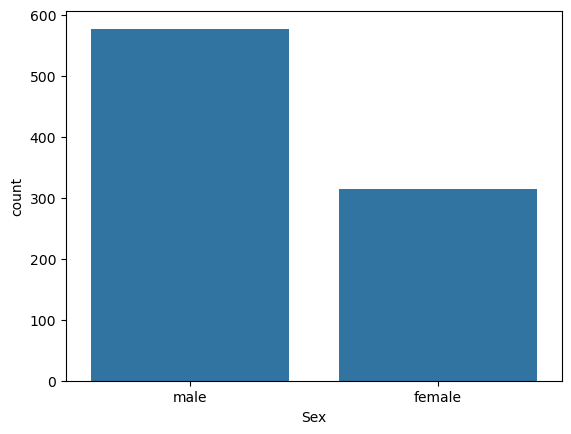

In [343]:
import seaborn as sns
sns.countplot(x="Sex",data=df)

In [344]:
survivors_by_gender = df.groupby("Sex")["Survived"].count().reset_index(name="No. of survivors")
survivors_by_gender

,Sex,No. of survivors
0,female,314
1,male,577


In [345]:
survivors_by_gender = df[df["Survived"]==0].groupby("Sex")["Survived"].count().reset_index(name="No. of passengers who died")
survivors_by_gender

,Sex,No. of passengers who died
0,female,81
1,male,468


### CONCLUSIONS AT THIS POINT:
- Around 80% of females survived the disaster.
- 55% of males survived the disaster.

## Q2] HOW MANY PEOPLE WERE THERE IN EACH Passenger-class:

<Axes: xlabel='Pclass', ylabel='count'>

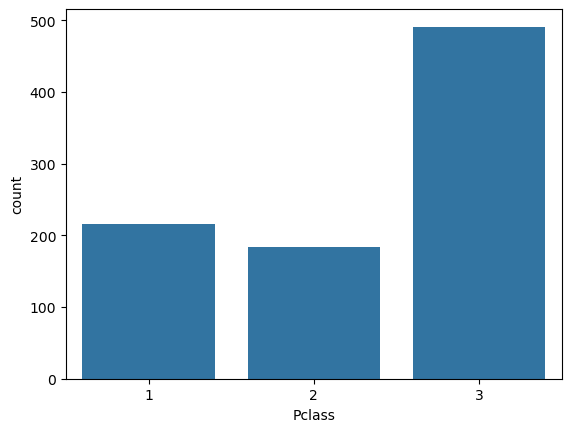

In [346]:
import seaborn as sns
sns.countplot(x="Pclass",data=df)

# Q3] AVERAGE TICKET-PRICES PAID BY EACH Passenger-class:

In [347]:

result = df.groupby("Pclass")["Fare"].mean().reset_index()
result

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


<Axes: xlabel='Pclass', ylabel='Fare'>

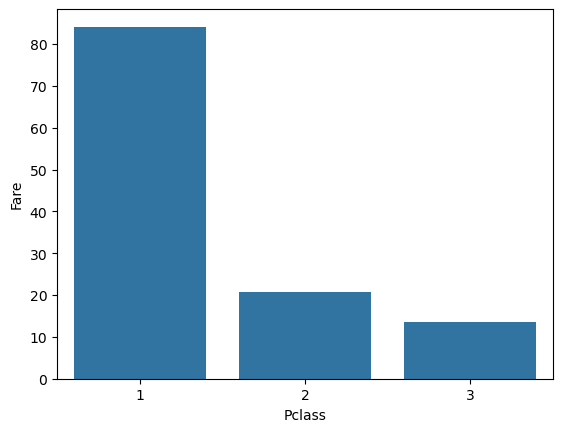

In [348]:
import seaborn as sns
sns.barplot(x="Pclass",y="Fare",data=result)

## Q4] HOW MANY PEOPLE SURVIVED IN EACH Passenger-class AND HOW MANY DID NOT SURVIVE:


In [349]:
result = df["Pclass"].value_counts().reset_index(name="Total no. of Passengers in the class")
result

,Pclass,Total no. of Passengers in the class
0,3,491
1,1,216
2,2,184


In [350]:
result = result.sort_values(by="Pclass")
result

,Pclass,Total no. of Passengers in the class
1,1,216
2,2,184
0,3,491


In [351]:
result = result.sort_values(by="Pclass").reset_index(drop=True)
result = df[df["Survived"]==1].groupby("Pclass")["Survived"].count().reset_index(name="Total no. of survivors")
result

,Pclass,Total no. of survivors
0,1,136
1,2,87
2,3,119


In [352]:

result = df[df["Survived"]==0].groupby("Pclass")["Survived"].count().reset_index(name="Did not survive")
result

,Pclass,Did not survive
0,1,80
1,2,97
2,3,372


### CONCLUSION TILL HERE:
- Most people on the ship were from 3rd passenger-class.
- People belonging to the 1st passenger-class paid the most fare.
- More than 50% of people in 1st passenger-class survived the disaster.
- Only 47% passengers in 2nd passenger-class survived the disaster.
- Only 24% passengers in 3rd passenger-class survived the disaster.


# ML QUESTIONS:

## Q1] PREDICTING FARE-AMOUNT BASED ON:
- Passenger Class
- Family Members
- Embarkation Point

In [353]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

independent_variables = ["Pclass","Number of Family Members","Embarkation Point Encoded"]
reg.fit(df_copy[independent_variables],df["Fare"])
reg.predict([[3,2,2]])

array([6.21894201])

## Q2] PREDICTING PASSENGER-AGE BASED ON:
- Passenger Class
- Number of Family Members
- Gender

In [354]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

independent_variables = ["Pclass","Number of Family Members","Sex"]
reg.fit(df_copy[independent_variables],df["Age"])
reg.predict([[3,2,0]])

array([26.37839535])

## Q3] RELATIONSHIP BETWEEN FARE AND PASSENGER-CLASS:

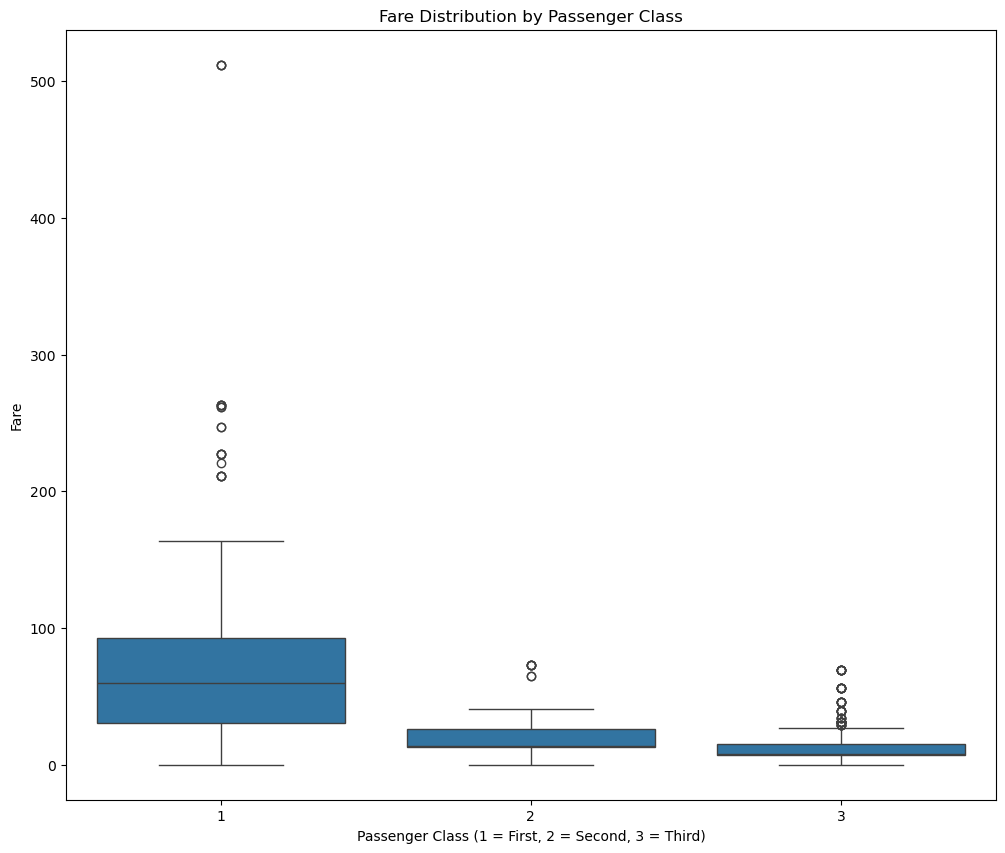

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Fare', data=df_copy)
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Fare")
plt.show()


**CONCLUSION AT THIS POINT:**
- Passengers belonging to class 1 paid highest fair and in the range of 50 to 100 pounds (approx.)
- Passengers belonging to class 2 paid moderate fair and in the range of 20 to 40 pounds (approx.)
- Passengers belonging to class 3 paid least fair and in the range of  20 to 30 pounds (approx.)


In [356]:
df_copy.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2
5,0,3,0,28,0,0,8,Q,1,1
6,0,1,0,54,0,0,51,S,1,2
7,0,3,0,2,3,1,21,S,5,2
8,1,3,1,27,0,2,11,S,3,2
9,1,2,1,14,1,0,30,C,2,0


## Q4] Effect of Family Size on Fare

In [357]:
from sklearn import linear_model

reg = linear_model.LinearRegression()


reg.fit(df_copy[["Number of Family Members"]],df["Fare"])
reg.predict([[1]])

array([26.15448989])

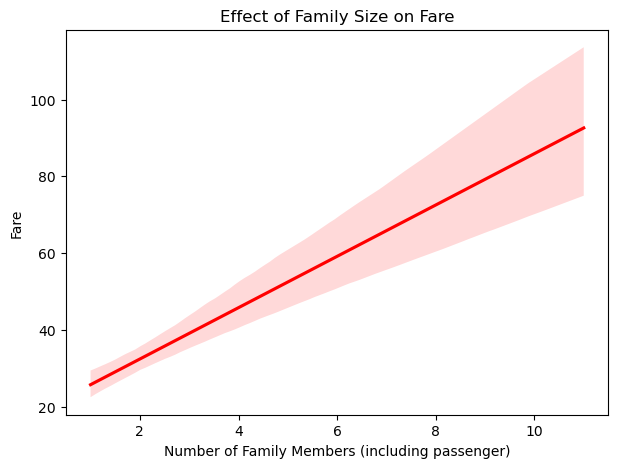

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.regplot(x='Number of Family Members', y='Fare', data=df_copy, scatter=False, color='red')
plt.title("Effect of Family Size on Fare")
plt.xlabel("Number of Family Members (including passenger)")
plt.ylabel("Fare")
plt.show()

**CONCLUSION AT THIS POINT: Ticket Prices increases as the no. of family members increases (for all passenger classes 1 , 2 and 3)**

# Q5] PREDICTING SURVIVAL BASED ON:
- Age
- Fare

In [359]:
df_copy.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2
5,0,3,0,28,0,0,8,Q,1,1
6,0,1,0,54,0,0,51,S,1,2
7,0,3,0,2,3,1,21,S,5,2
8,1,3,1,27,0,2,11,S,3,2
9,1,2,1,14,1,0,30,C,2,0


In [360]:
from sklearn.linear_model import LogisticRegression

reg = linear_model.LogisticRegression()


reg.fit(df_copy[["Age","Fare"]],df["Survived"])
reg.predict([[20,7.25]])

array([0])

In [361]:
from sklearn.linear_model import LogisticRegression

reg = linear_model.LogisticRegression()


reg.fit(df_copy[["Age","Fare"]],df["Survived"])
reg.predict([[54,1030.07]])

array([1])

Text(0, 0.5, 'Survival chance (0 means not survived ; 1 means survived)')

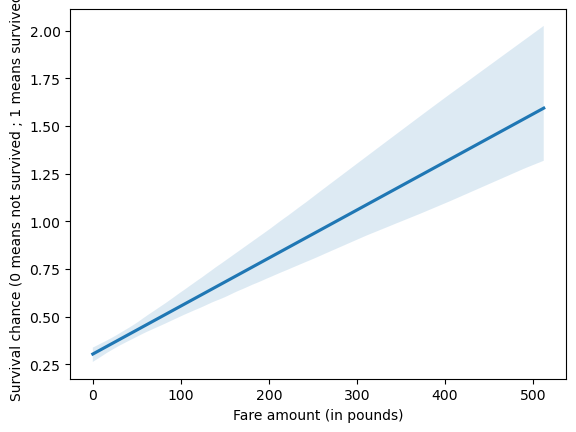

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="Fare",y="Survived",data=df_copy,scatter=False)


plt.xlabel("Fare amount (in pounds)")
plt.ylabel("Survival chance (0 means not survived ; 1 means survived)")

Text(0, 0.5, 'Survival chance (0 means not survived ; 1 means survived)')

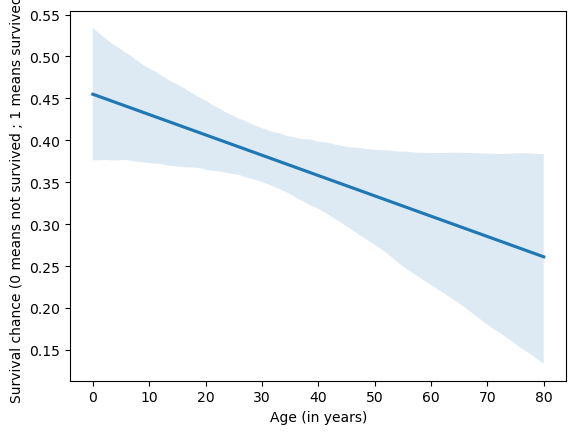

In [363]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x="Age",y="Survived",data=df_copy,scatter=False)

plt.xlabel("Age (in years)")
plt.ylabel("Survival chance (0 means not survived ; 1 means survived)")

**CONCLUSION AT THIS POINT:**
- A 20 year old (male/female) who paid nearly 7 pounds was likely not to survive.
- A 50 year old (male/female) who paid nearly 1000 pounds was likely to survive.
- People who spent more money on the trip; were more likely to survive.
- People who were elderly were more likely to not survive.

### CONCLUSION DRAWN FROM THE ENTIRE ANALYSIS (TILL HERE):
- Passengers in higher classes (1st class) paid substantially higher fares than those in lower classes.
- Males in higher classes tended to be older, while females and lower-class passengers were generally younger.
- Customers in higher passenger-class pay higher fares
- Larger families tended to pay slightly higher total fares, possibly because they booked together or purchased multiple tickets.
- Younger passengers and those who paid higher fares (likely first-class passengers) had a higher chance of survival.

## USE DECISION-TREE TO PREDICT Passenger-Survival based on :
- Pclass
- Sex
- Age
- Sibsp (No. of Siblings if any)
- Parch (No. of parents / children aboard on Titanic)
- Fare

In [364]:
df_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


In [365]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


independent_variables = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
model.fit(df_copy[independent_variables],df_copy["Survived"])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [366]:
#Check the model's accuracy:
model.score(df_copy[independent_variables],df_copy["Survived"])

0.9528619528619529

In [367]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [368]:
df_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


### Now make a prediction for a person with these details:
- Passenger-class : 3
- Gender : Male
- Age: 22
- No. of siblings: 1
- No. of parents and children: 0
- Trip Fare: 7 pounds (approx.)


In [369]:

model.predict([[3,0,22.0,1,0,7.25]])

array([0])

**CONCLUSION OF THIS POINT:** PASSENGER WITH THESE DETAILS WAS LIKELY TO SURVIVE

- Passenger-class : 3
- Gender : Male
- Age: 22
- No. of siblings: 1
- No. of parents and children: 0
- Trip Fare: 7 pounds (approx.)

In [370]:
df_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


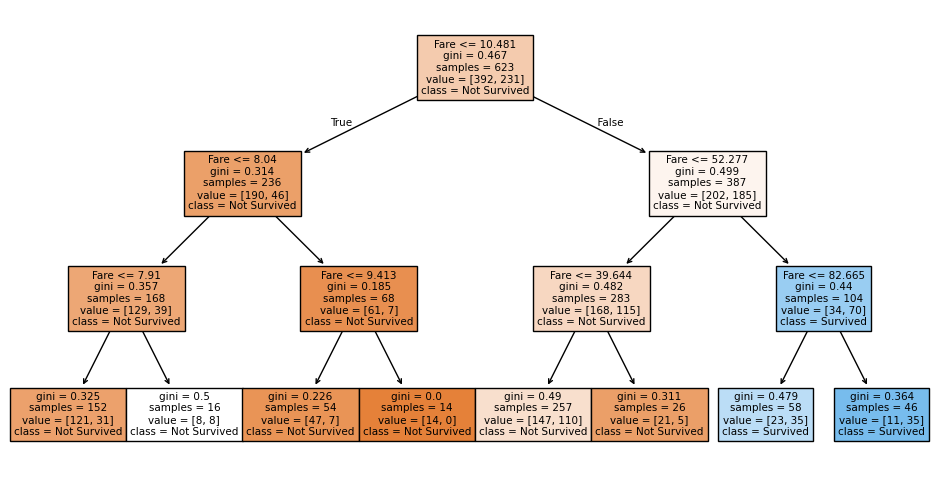

Accuracy: 0.6716417910447762


In [371]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


X = df[['Fare']]
y = df['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)


plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['Fare'], class_names=['Not Survived','Survived'], filled=True)
plt.show()


print("Accuracy:", model.score(X_test, y_test))


**CONCLUSION OF THIS POINT:** 
Passengers who paid higher prices (i.e. more then 83 pounds) had a much greater chance of survival.)

In [372]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [373]:
df_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


**KNN QUESTION ] Using the Titanic dataset, build a K-Nearest Neighbors (KNN) model to predict whether a passenger (male / female) survived or not based on their Age , Gender and Fare.
After training, predict the survival status of a female passenger aged 30 years who paid a fare of $100.
Finally, find out how well your model performs using the accuracy score.**

In [374]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [375]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


In [376]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [377]:
df_copy.isnull().sum()

Survived                     0
Pclass                       0
Sex                          0
Age                          0
SibSp                        0
Parch                        0
Fare                         0
Embarked                     0
Number of Family Members     0
Embarkation Point Encoded    0
dtype: int64

In [378]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


In [379]:
inputs = df_copy.drop(["Survived","Pclass","SibSp","Parch","Embarked","Number of Family Members","Embarkation Point Encoded"],axis="columns")

In [380]:
outputs = df_copy.drop(["Age","Fare","Pclass","Sex","SibSp","Parch","Embarked","Number of Family Members","Embarkation Point Encoded"],axis="columns")

In [381]:
inputs

,Sex,Age,Fare
0,0,22,7
1,1,38,71
2,1,26,7
3,1,35,53
4,0,35,8
...,...,...,...
886,0,27,13
887,1,19,30
888,1,28,23
889,0,26,30


In [382]:
outputs

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [383]:
from sklearn.model_selection import train_test_split
X = inputs
y = outputs

In [384]:
X

,Sex,Age,Fare
0,0,22,7
1,1,38,71
2,1,26,7
3,1,35,53
4,0,35,8
...,...,...,...
886,0,27,13
887,1,19,30
888,1,28,23
889,0,26,30


In [385]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [387]:
len(X_train)

712

In [388]:
len(X_test)

179

**Create KNN (K Neighrest Neighbour Classifier)**

In [389]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [390]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [391]:
knn.score(X_test,y_test)

0.7318435754189944

In [392]:
knn.predict([[1,38,71]])

array([1])

In [393]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [394]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


**CONCLUSION OF THIS KNN MODEL: A Female Person of 38 years of age and with an income of 71 pounds (British pounds) is likely to survive**

**Plot Confusion Matrix**

In [395]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[91, 15],
       [33, 40]])

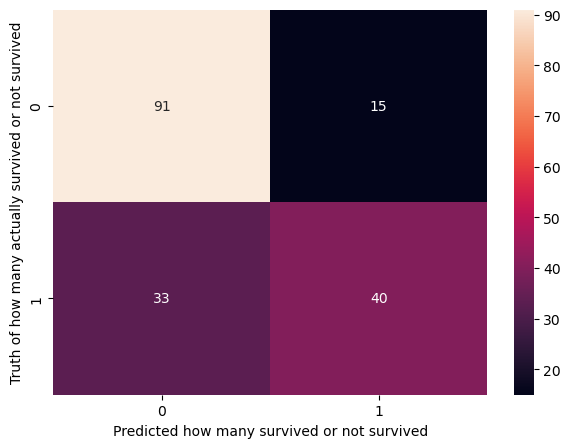

In [396]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted how many survived or not survived')
plt.ylabel('Truth of how many actually survived or not survived')
plt.show()


**Prepare a classification report:**

In [397]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       106
           1       0.73      0.55      0.62        73

    accuracy                           0.73       179
   macro avg       0.73      0.70      0.71       179
weighted avg       0.73      0.73      0.72       179



**Meaning of the heatmap created :**
**0s and 1s on the heatmap means :**
- *0 means passenger did not survived*
- *1 means passenger survived*


**CONCLUSIONS DRAWN FROM THE ABOVE HEATMAP CREATED :**

    - We accurately predicted that 91 passengers didnt survive and 40 passengers survived
    - 33 passengers actually survived but we falsely predicted that they didnt survive
    - We falsely predicted that 15 passengers survived but actually they didnt.


**RANDOM FOREST QUESTION] Using a Random Forest Classifier, find out which features — Sex, Age, or Fare — are most important for predicting survival.**

In [398]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [399]:
df_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


In [400]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

X = df_copy[["Sex","Age","Fare"]]
y = df_copy["Survived"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.25, random_state=42) # Split dataset into 75% train and 25% test

randomForest_Model = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest_Model.fit(X_train, y_train)

#Check model score:
randomForest_Model.score(X_test,y_test)

0.7668161434977578

In [401]:
#Make Predictions:
y_predicted = randomForest_Model.predict(X_test)

In [402]:
y_predicted

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0])

Text(95.72222222222221, 0.5, 'Truth')

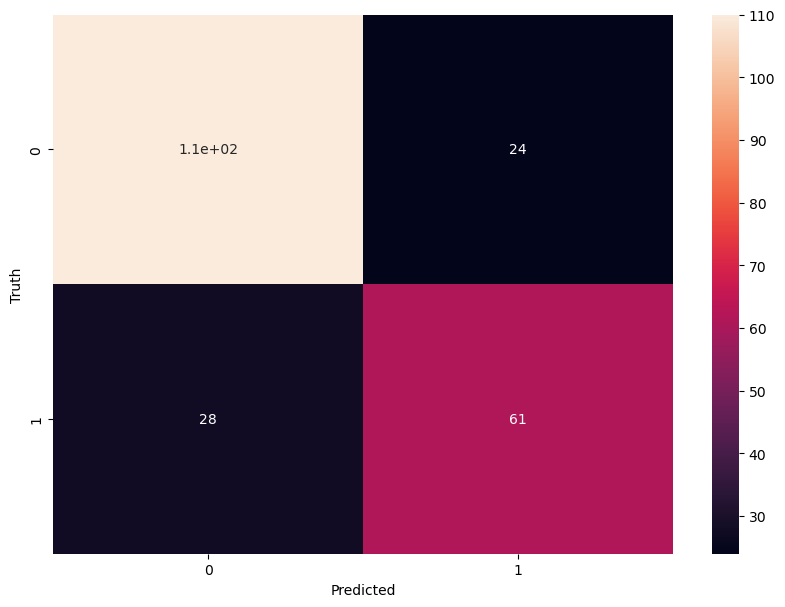

In [403]:
# Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)


import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**CONCLUSION FROM THE ABOVE HEATMAP]**
- The model correctly predicted that :
    - 110 passengers did not survived
    - 61 passengers survived
- The model incorrectly predicted that :
    - 28 passengers didnt survive ; but actually they did survive
    - 24 passengers survived ; but actually they didnt

### **NAIVE BAYES QUESTION]** Predict a passenger's survival chances based on his'/her's passenger-class and family-size ; using naive bayes

In [404]:
df_copy.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number of Family Members,Embarkation Point Encoded
0,0,3,0,22,1,0,7,S,2,2
1,1,1,1,38,1,0,71,C,2,0
2,1,3,1,26,0,0,7,S,1,2
3,1,1,1,35,1,0,53,S,2,2
4,0,3,0,35,0,0,8,S,1,2


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = df_copy[["Pclass","Number of Family Members"]]
y = df_copy["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions for the testing-data:
y_pred = naive_bayes_model.predict(X_test)

# Check the accuracy of the model:
print("Predicted:", y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Predicted: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Accuracy: 0.5783582089552238


In [406]:
new_passengers = pd.DataFrame([
    [1, 3],   # Example 1: 1st class, 3 family members
    [3, 1],   # Example 2: 3rd class, 1 family member
    [2, 0],   # Example 3: 2nd class, traveling alone
    [3, 5],   # Example 4: 3rd class, 5 family members
    [2,10],   # Example 5: 2nd class, 10 family members
    [1,4],    # Example 6: 1st class, 4 family members
    [3,30]    # Example 7: 3rd class, 30 family members
], columns=["Pclass", "Number of Family Members"])

predictions = naive_bayes_model.predict(new_passengers)

# Show results
result_df = new_passengers.copy()
result_df["Predicted Survival (1=Survived, 0=Not Survived)"] = predictions
result_df

,Pclass,Number of Family Members,"Predicted Survival (1=Survived, 0=Not Survived)"
0,1,3,0
1,3,1,0
2,2,0,0
3,3,5,0
4,2,10,1
5,1,4,0
6,3,30,1


<Axes: xlabel='Number of Family Members', ylabel='Predicted Survival (1=Survived, 0=Not Survived)'>

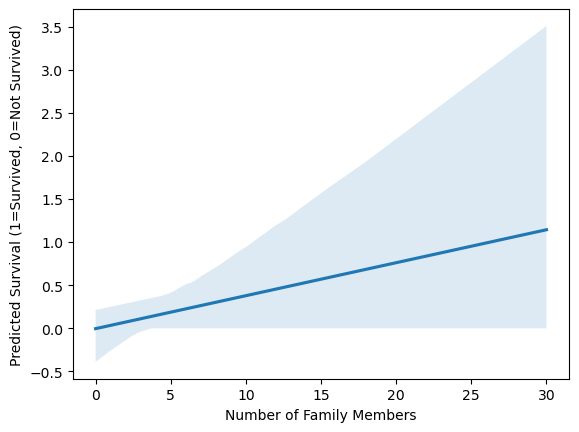

In [407]:
import seaborn as sns
sns.regplot(scatter=False,data=result_df,x="Number of Family Members",y="Predicted Survival (1=Survived, 0=Not Survived)")

### CONCLUSION OF THE ABOVE VISUALIZATION: Larger families had the highest chance of survival.

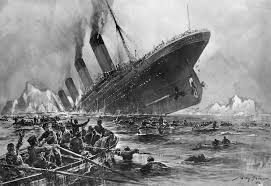

In [408]:
from IPython.display import Image, display

display(Image(filename="ending_image.jpg", width=700,height=300))


#### END OF THE NOTEBOOK

Prepared by:
- Name: Om Satyawan Pathak
- Contact: omsatyawanpathakwebdevelopment@gmail.com   (or)  omsatyawanpathakgit@gmail.com